In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Replace with your file path
#fileNameCSV = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
fileNameCSV = "WholeDataAsNumbers.csv"
try:
    # Attempt to read the CSV file into a DataFrame
    df = pd.read_csv(fileNameCSV)
except PermissionError:
    print(f"PermissionError: You do not have permission to read the file '{fileNameCSV}'.")
except FileNotFoundError:
    print(f"FileNotFoundError: The file '{fileNameCSV}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")

print("Dataset dimensions:", df.shape)

#print(df.info())
print(df.columns)
df = df.drop(columns=['EmployeeCount'])
df = df.drop(columns=['StandardHours'])
df = df.drop(columns=['Over18'])
df = df.drop(columns=['EmployeeNumber'])

Dataset dimensions: (1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


1. Preprocess the Dataset

In [71]:
#Encode Categorical Variables:
#df = pd.get_dummies(df, drop_first=True)
#Encode Categorical Variables:
df = pd.get_dummies(df, drop_first=True)
#Standardize the Data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target_column = [col for col in df.columns if col.startswith('Attrition')][0]
data_scaled = scaler.fit_transform(df.drop(target_column, axis=1))



2. Handle the Class Imbalance

In [72]:
#Smote
from imblearn.over_sampling import SMOTE

X = df.drop(target_column, axis=1)
y = df[target_column]

# Calculate the sampling proportion for 200% oversampling
current_minority_count = y.value_counts()[y.value_counts().idxmin()]
current_majority_count = y.value_counts()[y.value_counts().idxmax()]
desired_minority_count = current_minority_count * 2

sampling_strategy = desired_minority_count / current_majority_count

# Apply SMOTE with the corrected sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())



# Combine X_resampled and y_resampled into a single DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data[target_column] = y_resampled

# Save the resampled data to a CSV file
resampled_data.to_csv('SmotedData.csv', index=False)

print("Resampled data has been saved to 'SmotedData.csv'.")



Before SMOTE: Attrition
0    1233
1     237
Name: count, dtype: int64
After SMOTE: Attrition
0    1233
1     473
Name: count, dtype: int64
Resampled data has been saved to 'SmotedData.csv'.


3. Explore the Data

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.127006
DailyRate                  -0.056652
Department                 -0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.035303
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus              -0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
Y

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

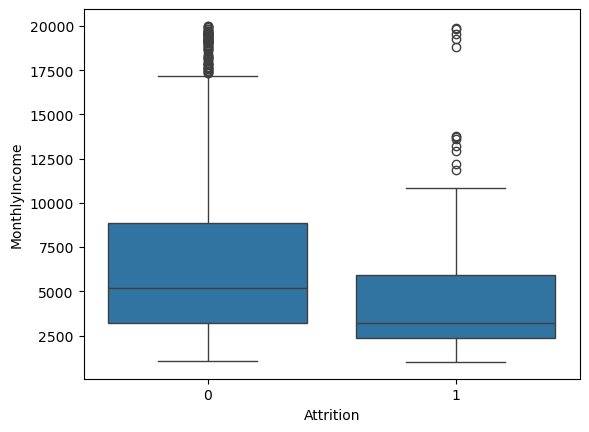

In [73]:
#Correlation Analysis:
correlation_matrix = df.corr()
print(correlation_matrix[target_column])
#EDA (Exploratory Data Analysis):
import seaborn as sns
sns.boxplot(x=target_column, y='MonthlyIncome', data=df)
#sns.barplot(x=target_column, y='OverTime', data=df)


4. Feature Selection

In [74]:
#Use statistical and machine learning techniques to identify important features:
#InfoGainAttributeEval
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Calculate information gain for each feature
info_gain = mutual_info_classif(X, y)

# Create a DataFrame for better visualization
info_gain_df = pd.DataFrame({'Feature': X.columns, 'InfoGain': info_gain})

# Sort features by information gain in descending order
info_gain_df = info_gain_df.sort_values(by='InfoGain', ascending=False)
print(info_gain_df)


                     Feature  InfoGain
18                  OverTime  0.041214
12                   JobRole  0.035040
27        YearsInCurrentRole  0.032748
15             MonthlyIncome  0.031066
29      YearsWithCurrManager  0.027644
26            YearsAtCompany  0.026476
11                  JobLevel  0.024611
22          StockOptionLevel  0.021921
0                        Age  0.020305
14             MaritalStatus  0.020187
5                  Education  0.019772
13           JobSatisfaction  0.017808
21  RelationshipSatisfaction  0.014282
8                     Gender  0.014118
23         TotalWorkingYears  0.013572
10            JobInvolvement  0.012089
6             EducationField  0.010450
3                 Department  0.007036
17        NumCompaniesWorked  0.005589
1             BusinessTravel  0.003592
20         PerformanceRating  0.003004
2                  DailyRate  0.002517
16               MonthlyRate  0.002162
24     TrainingTimesLastYear  0.001464
19         PercentSalaryH

In [75]:
#Use statistical and machine learning techniques to identify important features:
#Random Forest:
print("Random Forest:")
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
print("Logistic Regression Coefficients:")

#Logistic Regression Coefficients:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_resampled, y_resampled)
print(pd.Series(lr.coef_[0], index=X.columns).sort_values(ascending=False))


Random Forest:
MonthlyIncome               0.066947
MonthlyRate                 0.049690
Age                         0.048919
TotalWorkingYears           0.045547
MaritalStatus               0.045252
DistanceFromHome            0.045105
HourlyRate                  0.045088
JobSatisfaction             0.044506
StockOptionLevel            0.044457
DailyRate                   0.043449
JobInvolvement              0.042935
YearsWithCurrManager        0.037461
EnvironmentSatisfaction     0.036669
YearsAtCompany              0.036481
RelationshipSatisfaction    0.032506
YearsInCurrentRole          0.030425
Department                  0.030277
PercentSalaryHike           0.028198
NumCompaniesWorked          0.027603
JobRole                     0.027323
TrainingTimesLastYear       0.027313
WorkLifeBalance             0.025548
YearsSinceLastPromotion     0.023853
JobLevel                    0.023155
OverTime                    0.023109
EducationField              0.023053
Education              

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
import pandas as pd
import statsmodels.api as sm

# Define features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Add a constant to the features (for intercept in regression)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Get p-values and coefficients
p_values = model.pvalues
coefficients = model.params

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Feature': coefficients.index, 'Coefficient': coefficients.values, 'P-Value': p_values.values})

# Select significant features with p-value < 0.05
significant_results = results_df[results_df['P-Value'] < 0.05]

# Drop the row for the constant term, if present
significant_results = significant_results[significant_results['Feature'] != 'const']

# Print the results
print("Significant Features with Coefficients and P-Values:")
print(significant_results)



Significant Features with Coefficients and P-Values:
                     Feature  Coefficient       P-Value
1                        Age    -0.003770  4.835511e-03
2             BusinessTravel     0.082485  3.399468e-07
4                 Department    -0.057179  1.108880e-02
5           DistanceFromHome     0.003506  9.570437e-04
8    EnvironmentSatisfaction    -0.040183  3.500794e-07
9                     Gender     0.039541  2.441223e-02
11            JobInvolvement    -0.061900  3.445677e-07
14           JobSatisfaction    -0.038428  9.377822e-07
15             MaritalStatus    -0.052733  8.807292e-04
18        NumCompaniesWorked     0.016944  1.047496e-05
19                  OverTime     0.206721  4.112201e-26
22  RelationshipSatisfaction    -0.022110  5.497783e-03
26           WorkLifeBalance    -0.027725  2.271344e-02
27            YearsAtCompany     0.005959  4.580343e-02
28        YearsInCurrentRole    -0.010186  8.805932e-03
29   YearsSinceLastPromotion     0.011073  1.241571

5. Build Predictive Models

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_resampled, y_resampled)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       371
           1       0.96      0.76      0.85       141

    accuracy                           0.93       512
   macro avg       0.94      0.87      0.90       512
weighted avg       0.93      0.93      0.92       512

